<a href="https://colab.research.google.com/github/joaochenriques/2021-code-smells/blob/main/Pico_Turbine_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as mpl
import numpy as np
import pathlib, subprocess, os
from scipy.interpolate import interp1d

In [2]:
def cmdcall( cmd ):
    output = subprocess.getoutput( cmd )
    print(output)

In [3]:
if not pathlib.Path("mpl_utils.py").exists():
    cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import mpl_utils as mut
mut.config_plots()

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

mpl.rcParams['lines.markersize'] = 6.5
mpl.rcParams['lines.markerfacecolor'] = 'white'
mpl.rcParams['lines.markeredgewidth'] = 1

cor = mut.linecolors

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3921  100  3921    0     0  13796      0 --:--:-- --:--:-- --:--:-- 13806


In [4]:
Phi1 = np.array([0.004763, 0.008077, 0.010941, 0.013151, 0.015497, 0.01712 ,
                0.019125, 0.021784, 0.023953, 0.026326, 0.028699, 0.030909,
                0.033241, 0.035991, 0.037578, 0.039419, 0.041711, 0.043757,
                0.046007, 0.04793 , 0.050549, 0.052595, 0.05464 , 0.057505,
                0.062824, 0.065197, 0.06712 , 0.073094])
Psi1 = np.array([0.01444079, 0.02276062, 0.02987161, 0.03675419, 0.0431309 , 0.04792697,
                0.05382361, 0.06079078, 0.06769536, 0.0734816 , 0.08053168, 0.08659201,
                0.09360825, 0.10071701, 0.10456838, 0.11273668, 0.12937974, 0.13732821,
                0.1453655 , 0.15139791, 0.15835663, 0.16435605, 0.17024888, 0.17827348,
                0.19825125, 0.20629108, 0.2131432 , 0.24528476])

Phi2 = np.array([0.007970, 0.011139, 0.013171, 0.015661, 0.017112, 0.019103,
                0.021704, 0.024060, 0.026417, 0.028611, 0.030968, 0.033162,
                0.036007, 0.037510, 0.038932, 0.041776, 0.043971, 0.046002,
                0.047953, 0.050675, 0.052747, 0.056648, 0.061606, 0.065344,
                0.067132, 0.071926])
eta2 = np.array([0.356658, 0.547270, 0.604519, 0.640788, 0.663134, 0.685081,
                0.698549, 0.706662, 0.704068, 0.701349, 0.701596, 0.676967,
                0.660863, 0.615547, 0.544428, 0.191829, 0.159951, 0.121318,
                0.084620, 0.048932, 0.033384, 0.017568, 0.011473, 0.008590,
                0.008507, 0.008466])

Psi3 = np.array( [0,0.245] )

PsiOfPhi = interp1d( Phi1, Psi1, kind='cubic' )
Psi2 = PsiOfPhi( Phi2 )

Psi16 = Psi1[0:16]
Phi16 = Phi1[0:16]

slope = Psi16.dot(Phi16) / Psi16.dot(Psi16) # Least squares fit

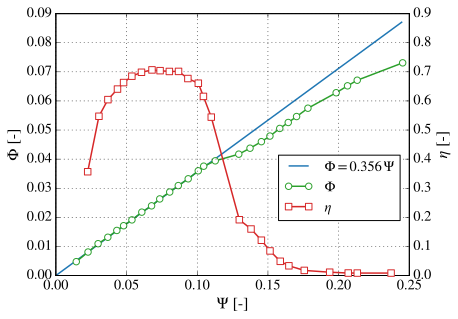

In [8]:
ln0 = mpl.plot( Psi3, slope*Psi3, color=cor[0], markeredgecolor=cor[0], label=f'$\Phi={slope:.3f}\,\Psi$' )
ln1 = mpl.plot( Psi1, Phi1, 'o-', color=cor[2], markeredgecolor=cor[2], label='$\Phi$' )
mpl.grid()

mpl.xlabel( '$\Psi$ [-]' )
mpl.ylabel( '$\Phi$ [-]' );

ax2 = mpl.gca().twinx()

ln2 = ax2.plot( Psi2, eta2, 's-', color=cor[3], markeredgecolor=cor[3], label='$\eta$', clip_on=False, zorder=10 )

lns = ln0+ln1+ln2
labs = [l.get_label() for l in lns]
mpl.legend(lns, labs, loc=(0.63,0.21))

# ax2.legend(loc='upper left')
ax2.set_ylabel( '$\eta$ [-]' );
ax2.set_ylim(0,0.9)
mpl.savefig('PicoTurbine.pdf');